In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\Neha singh\Desktop\Fludata"

C:\Users\Neha singh\Desktop\Fludata


In [3]:
vaccinetrain=pd.read_csv("training_set_features.csv")

In [4]:
vaccinetest=pd.read_csv("test_set_features.csv")

In [5]:
vaccinelabels=pd.read_csv("training_set_labels.csv")

In [6]:
print (vaccinetrain.shape)
print (vaccinetest.shape)
print (vaccinelabels.shape)

(26707, 36)
(26708, 36)
(26707, 3)


In [7]:
vaccinetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [8]:
vaccinetest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [9]:
vaccinetrain['data']='train'
vaccinetest['data']='test'

In [10]:
combinedf=pd.concat([vaccinetrain,vaccinetest],axis=0)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 26707
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_mo

In [13]:
original=combinedf

In [14]:
mask=combinedf.isnull()

In [15]:
combinedf=combinedf.astype(str).apply(LabelEncoder().fit_transform)

In [16]:
combinedf=combinedf.where(~mask,original)

In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

In [18]:
imputer=IterativeImputer(estimator=DecisionTreeClassifier(),
                        initial_strategy="most_frequent",
                        max_iter=10)

In [19]:
combinedf1=combinedf.drop(['respondent_id','data'],axis=1)

In [20]:
combinedf1_impute=imputer.fit_transform(combinedf1)

C:\Users\Neha singh\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\Users\Neha singh\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [21]:
combinedf1_impute=pd.DataFrame(combinedf1_impute,columns=combinedf1.columns)

In [22]:
combinedf1_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53415 non-null  float64
 1   h1n1_knowledge               53415 non-null  float64
 2   behavioral_antiviral_meds    53415 non-null  float64
 3   behavioral_avoidance         53415 non-null  float64
 4   behavioral_face_mask         53415 non-null  float64
 5   behavioral_wash_hands        53415 non-null  float64
 6   behavioral_large_gatherings  53415 non-null  float64
 7   behavioral_outside_home      53415 non-null  float64
 8   behavioral_touch_face        53415 non-null  float64
 9   doctor_recc_h1n1             53415 non-null  float64
 10  doctor_recc_seasonal         53415 non-null  float64
 11  chronic_med_condition        53415 non-null  float64
 12  child_under_6_months         53415 non-null  float64
 13  health_worker   

<AxesSubplot: >

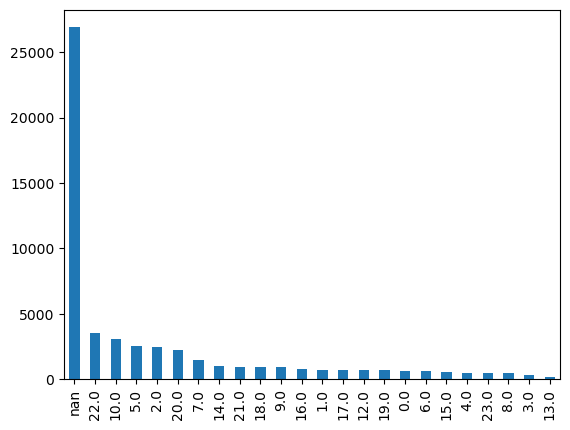

In [23]:
combinedf.employment_occupation.value_counts(dropna=False).plot(kind='bar')

<AxesSubplot: >

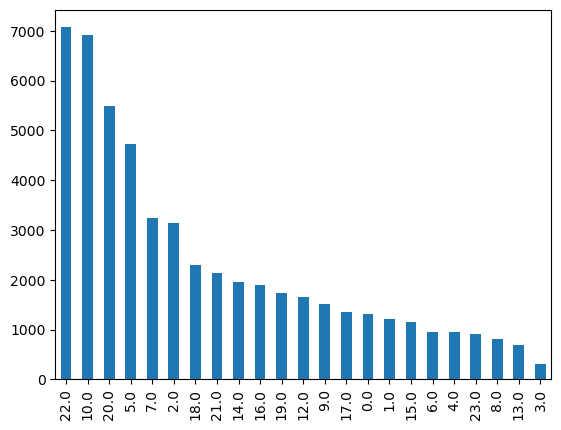

In [24]:
combinedf1_impute.employment_occupation.value_counts(dropna=False).plot(kind='bar')

In [25]:
vaccinetrain.education.value_counts(dropna=False)

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
NaN                  1407
Name: education, dtype: int64

In [26]:
combinedf1_impute=combinedf1_impute.reset_index()

In [27]:
combinedf=combinedf.reset_index()

In [28]:
combinedf1_impute['data']=combinedf.data

In [29]:
vaccinetraindf=combinedf1_impute[combinedf1_impute.data==1]
vaccinetestdf=combinedf1_impute[combinedf1_impute.data==0]

In [30]:
print (vaccinetraindf.shape)
print (vaccinetestdf.shape)

(26707, 37)
(26708, 37)


In [31]:
vaccinetraindf=vaccinetraindf.drop(['index','data'],axis=1)

In [32]:
vaccinetestdf=vaccinetestdf.drop(['index','data'],axis=1)

In [33]:
# Seasonal vaccine predictions
y=vaccinelabels.seasonal_vaccine
x=vaccinetraindf

<AxesSubplot: >

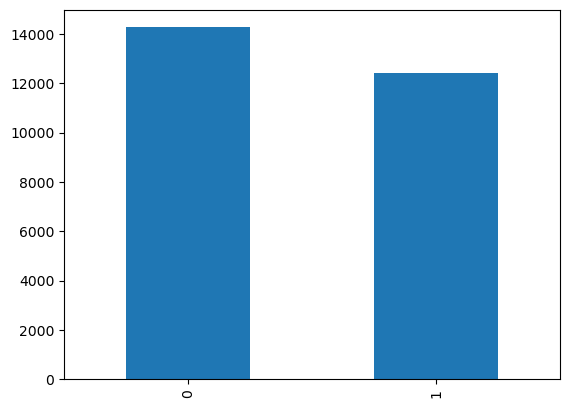

In [35]:
y.value_counts().plot(kind='bar') #Balanced Data

<AxesSubplot: >

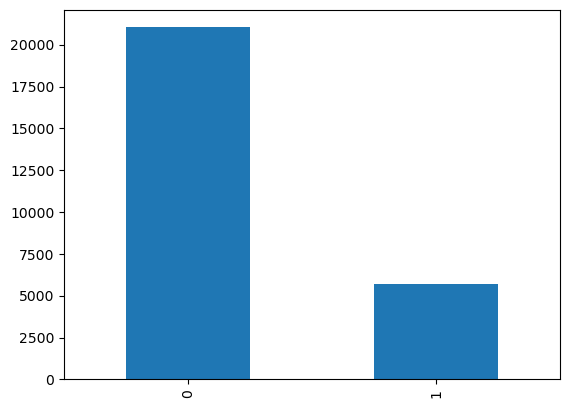

In [36]:
vaccinelabels.h1n1_vaccine.value_counts().plot(kind='bar') # Imbalance Data

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

In [38]:
logit=LogisticRegression(max_iter=1000)

In [39]:
logitmodel=logit.fit(x,y)

In [40]:
logitmodel.score(x,y)

0.7701726139214439

In [41]:
logitpredict=logitmodel.predict(x)

In [42]:
print (classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79     14272
           1       0.77      0.73      0.75     12435

    accuracy                           0.77     26707
   macro avg       0.77      0.77      0.77     26707
weighted avg       0.77      0.77      0.77     26707



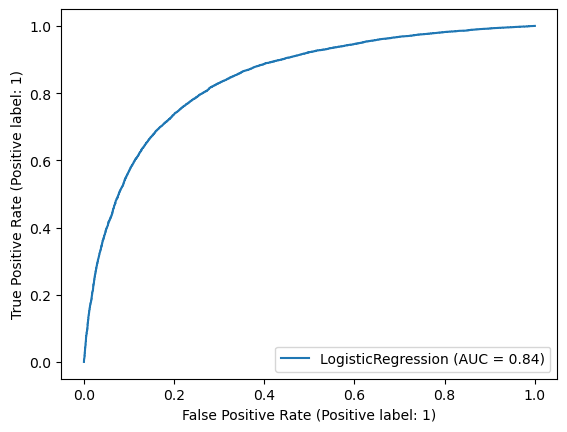

In [43]:
RocCurveDisplay.from_estimator(logit,x,y)

In [44]:
logith1n1=logit.fit(x,vaccinelabels.h1n1_vaccine)

In [45]:
logith1n1.score(x,vaccinelabels.h1n1_vaccine)

0.831804395851275

In [46]:
logith1n1predict=logith1n1.predict(x)

In [47]:
print (classification_report(vaccinelabels.h1n1_vaccine,logith1n1predict))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     21033
           1       0.67      0.40      0.50      5674

    accuracy                           0.83     26707
   macro avg       0.76      0.68      0.70     26707
weighted avg       0.82      0.83      0.81     26707



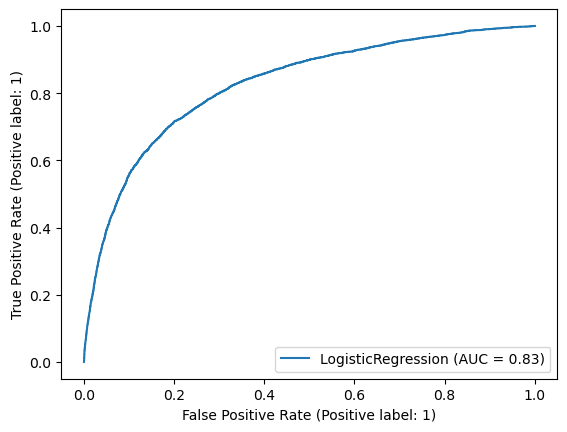

In [48]:
RocCurveDisplay.from_estimator(logit,x,vaccinelabels.h1n1_vaccine)

In [49]:
logitseason=logitmodel.predict_proba(vaccinetestdf)

In [50]:
logith1n1pred=logith1n1.predict_proba(vaccinetestdf)

In [51]:
pd.DataFrame(logitseason).to_csv("logit_season.csv")

In [52]:
pd.DataFrame(logith1n1pred).to_csv("logith1n1.csv")

In [53]:
# MICE Algorithm - Multivariate Imputation using Chained Equations.

In [55]:
from sklearn.naive_bayes import CategoricalNB

In [56]:
nb=CategoricalNB()

In [57]:
nbmodel=nb.fit(x,y)

In [58]:
nbmodel.score(x,y)

0.7538847493166586

In [59]:
nbseasonpred=nbmodel.predict_proba(vaccinetestdf)

In [60]:
nb2=CategoricalNB()

In [61]:
nb2model=nb2.fit(x,vaccinelabels.h1n1_vaccine)

In [62]:
nb2model.score(x,vaccinelabels.h1n1_vaccine)

0.7942112554760924

In [63]:
nbh1n1pred=nb2model.predict_proba(vaccinetestdf)

In [64]:
pd.DataFrame(nbseasonpred).to_csv("nbseason.csv")

In [65]:
pd.DataFrame(nbh1n1pred).to_csv("nbh1n1.csv")

In [66]:
# Machine Learning - Supervised Learning - Support Vector Machine
# Vector Arithmetic is basis of this algorithm.
# For Linear Data - Straight Line is drawn separating both the classes with
# maximum margin and is called maximum margin hyperplane.
# Two support vectors are drawn touching the closest observation to maximum margin hyperplane.
# Right Side of Maximum Margin hyperplane is Positive Hyperlane.
# Left Side of Maximum Margin hyperplane is Negative Hperlane.

# For Non Linear Data - Dimensionality has to be increased using the kernel.
# Popular Kernels are Gaussian RBF , Polynomial and Sigmoid

# Both Regression and Classification and performance is good in high
# dimension data.